In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/home/jovyan/Downloads/AB_NYC_2019.csv" 
df = pd.read_csv(file_path)

# Display basic info about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review       

In [3]:
# Display first few rows
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1        

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [5]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.

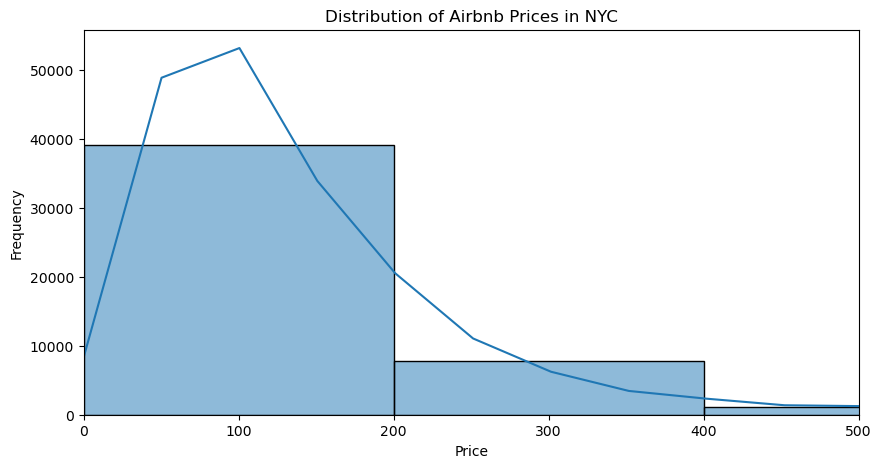

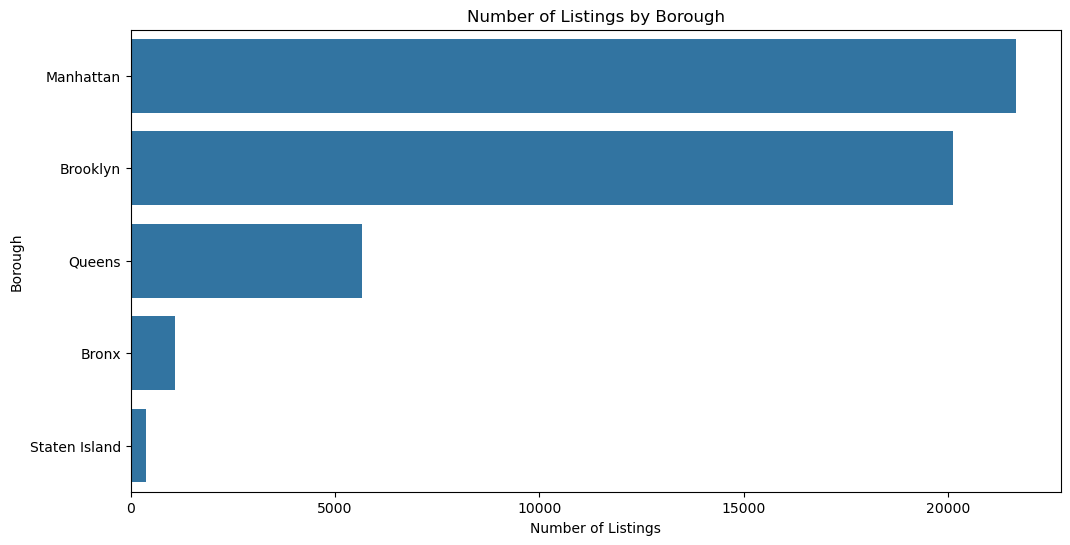

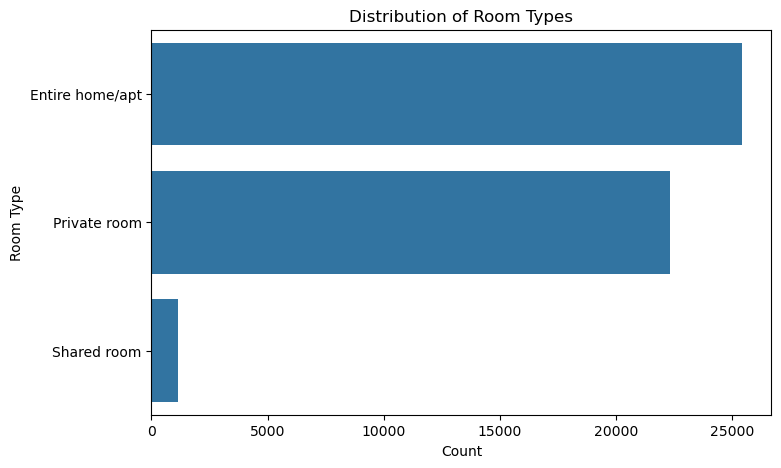

In [6]:
# Visualizing price distribution
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Airbnb Prices in NYC")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xlim(0, 500)  # Limiting to 500 for better visualization
plt.show()

# Count of listings per neighborhood
plt.figure(figsize=(12,6))
sns.countplot(y=df["neighbourhood_group"], order=df["neighbourhood_group"].value_counts().index)
plt.title("Number of Listings by Borough")
plt.xlabel("Number of Listings")
plt.ylabel("Borough")
plt.show()

# Room type distribution
plt.figure(figsize=(8,5))
sns.countplot(y=df["room_type"], order=df["room_type"].value_counts().index)
plt.title("Distribution of Room Types")
plt.xlabel("Count")
plt.ylabel("Room Type")
plt.show()


In [7]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Re-Load dataset
file_path = "/home/jovyan/Downloads/AB_NYC_2019.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
df = df.drop(columns=["id", "name", "host_id", "host_name", "last_review"])  # Not useful for prediction

# Handle missing values
df["reviews_per_month"].fillna(0, inplace=True)  # Replace NaN with 0 in reviews_per_month

# Convert categorical variables into numerical using One-Hot Encoding
categorical_features = ["neighbourhood_group", "neighbourhood", "room_type"]
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Define features (X) and target variable (y)
X = df_encoded.drop(columns=["price"])  # All features except price
y = df_encoded["price"]  # Target variable

# Remove outliers (prices greater than $500)
X = X[y <= 500]
y = y[y <= 500]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/tmp/ipykernel_63258/1832008345.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["reviews_per_month"].fillna(0, inplace=True)  # Replace NaN with 0 in reviews_per_month


In [8]:
# Train Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print model evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 41.16
Mean Squared Error (MSE): 3900.40
Root Mean Squared Error (RMSE): 62.45
R-Squared (R2): 0.52


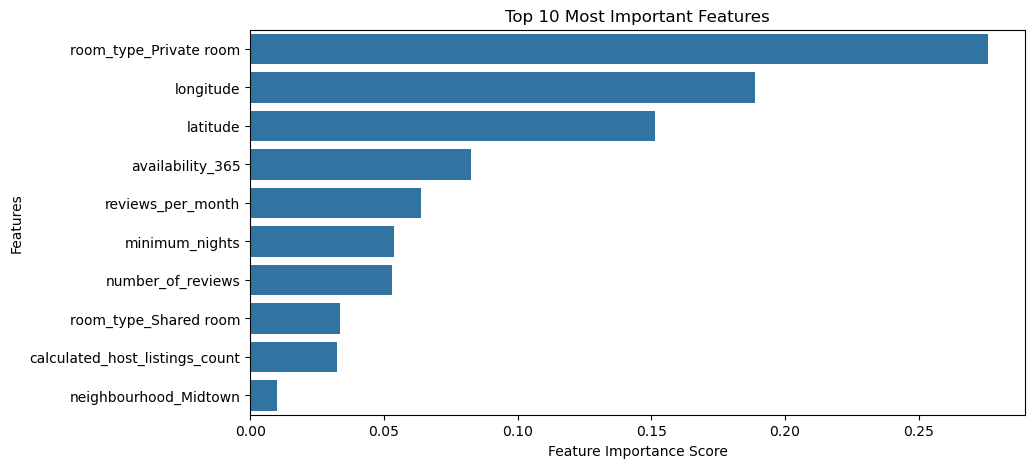

In [9]:
# Feature Importance Visualization
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10])
plt.title("Top 10 Most Important Features")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

In [10]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R² Score:", r2_score(y_test, y_pred_xgb))

XGBoost Performance:
MAE: 40.96144424343219
RMSE: 61.70060140465358
R² Score: 0.5347785949707031


In [15]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))


Linear Regression Performance:
MAE: 613068.0214915753
RMSE: 59972971.1590655
R² Score: -439533488287.7257


In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],  # Fewer estimators
    'max_depth': [None, 10],  # Only test two values
    'min_samples_split': [2, 5],  # Smaller range
    'min_samples_leaf': [1, 2]
}


rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid.fit(X_train, y_train)

print("Best Parameters:", rf_grid.best_params_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [16]:
rf_best = RandomForestRegressor(
    max_depth=None, 
    min_samples_leaf=2, 
    min_samples_split=5, 
    n_estimators=100, 
    random_state=42
)

rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_test)

print("Random Forest (Tuned) Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest (Tuned) Performance:
MAE: 40.728174874057366
RMSE: 61.79810250741551
R² Score: 0.533307178737185


In [17]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1]
}

xgb_search = RandomizedSearchCV(
    XGBRegressor(random_state=42), 
    param_grid, 
    n_iter=10, 
    cv=3, 
    n_jobs=-1, 
    verbose=2
)

xgb_search.fit(X_train, y_train)
print("Best XGBoost Parameters:", xgb_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best XGBoost Parameters: {'subsample': 1, 'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.05, 'colsample_bytree': 0.7}


In [21]:
df['log_price'] = np.log1p(df['price'])
df['reviews_x_availability'] = df['number_of_reviews'] * df['availability_365']
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df['neighborhood_cluster'] = kmeans.fit_predict(df[['latitude', 'longitude']])

In [22]:
xgb_final = XGBRegressor(
    n_estimators=200, 
    learning_rate=0.05, 
    max_depth=8, 
    subsample=1, 
    colsample_bytree=0.7, 
    random_state=42
)

xgb_final.fit(X_train, y_train)
y_pred_final = xgb_final.predict(X_test)

print("Final XGBoost Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_final))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_final)))
print("R² Score:", r2_score(y_test, y_pred_final))


Final XGBoost Performance:
MAE: 40.286483100832925
RMSE: 61.0566565791615
R² Score: 0.5444386005401611


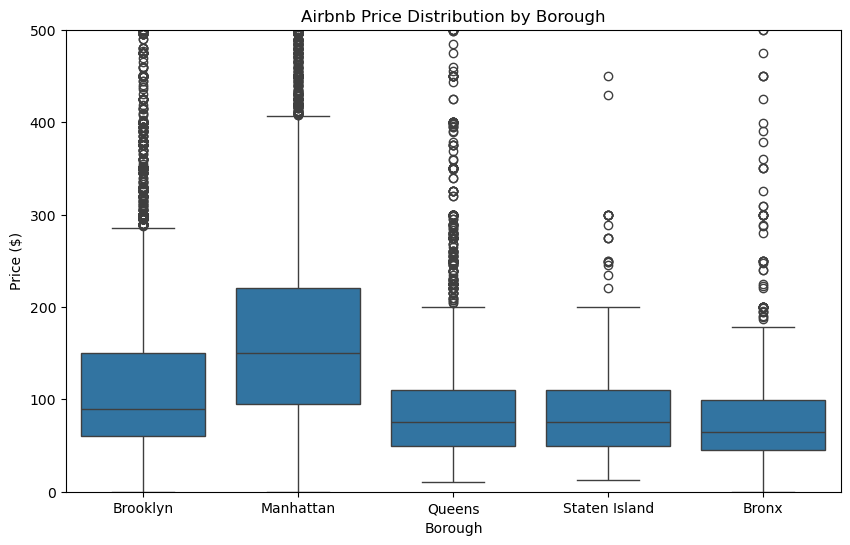

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x="neighbourhood_group", y="price", data=df)
plt.title("Airbnb Price Distribution by Borough")
plt.ylim(0, 500)  # Remove extreme outliers for better visualization
plt.xlabel("Borough")
plt.ylabel("Price ($)")
plt.show()


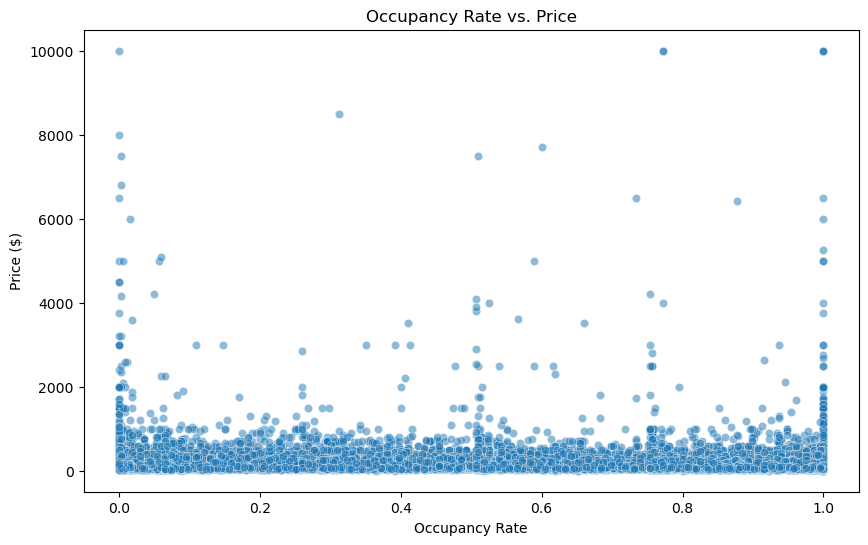

In [ ]:
df['occupancy_rate'] = 1 - (df['availability_365'] / 365)

plt.figure(figsize=(10,6))
sns.scatterplot(x='occupancy_rate', y='price', data=df, alpha=0.5)
plt.title("Occupancy Rate vs. Price")
plt.xlabel("Occupancy Rate")
plt.ylabel("Price ($)")
plt.show()


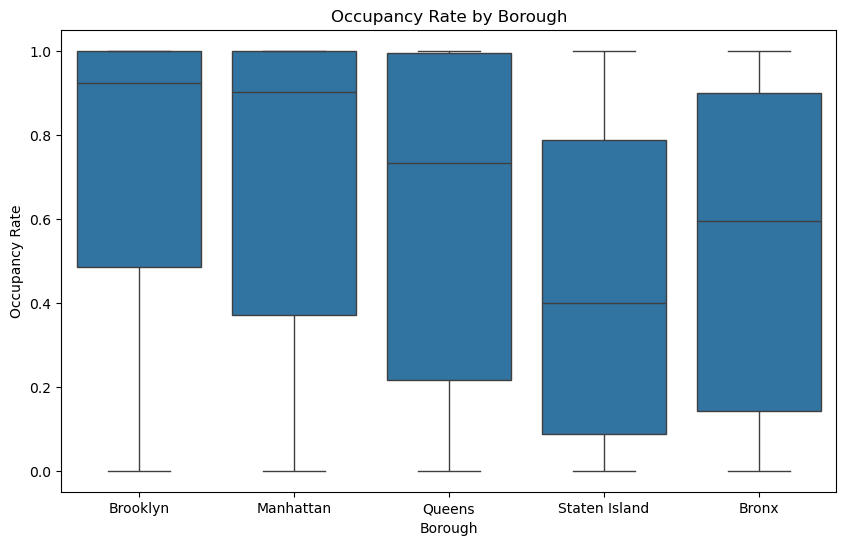

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x="neighbourhood_group", y="occupancy_rate", data=df)
plt.title("Occupancy Rate by Borough")
plt.xlabel("Borough")
plt.ylabel("Occupancy Rate")
plt.show()


In [33]:
import geopandas as gpd
import folium

# Create a map centered around NYC
m = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Add Airbnb listings as circles, color-coded by price
for _, row in df.sample(500).iterrows():  # Sample to avoid slow rendering
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color="red" if row['price'] > 150 else "blue",
        fill=True
    ).add_to(m)

# Save map to view in browser
m.save("airbnb_price_map.html")
